## Exercise meanshift
1. load 'data/iris_data.csv' into a dataframe (use decimal=',') and remove the 2 `Petal` columns. Now we are left with a 2D feature space
2. get unique labels (Species column)
3. plot with a scatter plot each iris flower sample colored by label (3 different colors)

4. use: `MeanShift` and `estimate_bandwidth` from `sklearn.cluster` to first estimate bandwidth and then get the clusters (HINT: estimate_bandwidth() takes an argument: `quantile` set it to `0.2` for best result)
5. print out labels, cluster centers and number of clusters (as returned from the MeanShift function)
5. create a new scatter plot where each flower is colored according to cluster label
6. add a dot for the cluster centers
7. Compare the 2 plots (colored by actual labels vs. colored by cluster label)
8. Try changing the 'quantile' argument to 0.15 and see what happens to your cluster plot.

In [14]:
# 1. load 'data/iris_data.csv' into a dataframe (use decimal=',') and remove the 2 `Petal` columns. 
#    Now we are left with a 2D feature space
import pandas as pd

df = pd.read_csv('../data/iris_data.csv')
df.head()
df.drop(['Petal length','Petal width','Species'], inplace=True, axis=1)

df




,Sepal length,Sepal width
0,"5,10","3,50"
1,"4,90","3,00"
2,"4,70","3,20"
3,"4,60","3,10"
4,"5,00","3,60"
...,...,...
145,"6,70","3,00"
146,"6,30","2,50"
147,"6,50","3,00"
148,"6,20","3,40"


In [9]:
# 2. get unique labels (Species column)
#uniqueSpecies = df['Species'].unique()
#print(uniqueSpecies)

['I. setosa' 'I. versicolor' 'I. virginica']


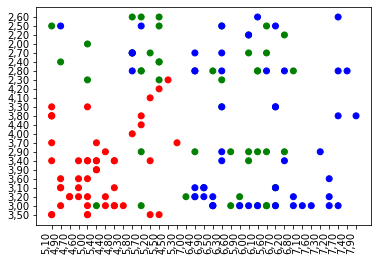

In [10]:
# 3. plot with a scatter plot each iris flower sample colored by label (3 different colors)
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

colors = {'I. setosa':'red', 'I. versicolor':'green', 'I. virginica':'blue'}

ax.scatter(df['Sepal length'], df['Sepal width'], c=df['Species'].map(colors))

result = plt.xticks(rotation=90, horizontalalignment='right',fontweight='light')
plt.show()

In [20]:
# 4. use: `MeanShift` and `estimate_bandwidth` from `sklearn.cluster` to 
#    first estimate bandwidth and then get the clusters 
#    (HINT: estimate_bandwidth() takes an argument: `quantile` set it to `0.2` for best result)
from sklearn.cluster import MeanShift, estimate_bandwidth

def mean_shift(data, n_samples=1000):
    bandwidth = estimate_bandwidth(data, quantile=0.2, 
                                   n_samples=n_samples)

    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(data)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_

    labels_unique = np.unique(labels)
    n_clusters = len(labels_unique)

    print('Number of estimated clusters : {}'.format(n_clusters))
    
    return bandwidth, labels, cluster_centers, n_clusters

bandwidth, labels, n_clusters = mean_shift(df)



               0     1     2     3     4     5     6     7     8     9    ...  \
Sepal length  5,10  4,90  4,70  4,60  5,00  5,40  4,60  5,00  4,40  4,90  ...   
Sepal width   3,50  3,00  3,20  3,10  3,60  3,90  3,40  3,40  2,90  3,10  ...   

               140   141   142   143   144   145   146   147   148   149  
Sepal length  6,70  6,90  5,80  6,80  6,70  6,70  6,30  6,50  6,20  5,90  
Sepal width   3,10  3,10  2,70  3,20  3,30  3,00  2,50  3,00  3,40  3,00  

[2 rows x 150 columns]


ValueError: could not convert string to float: '5,10'